    LaTeX генератор таблиц (наконец-то полноценный, ориентация вертикальная):

In [5]:
print ("Введите данные:")
no_parse_data = input().split(' ')
data = [i_stolb.split() for i_stolb in no_parse_data]
# print (data)

output = "\hline\n"
for i_str in range (len (data[0])):
    for i_stolb in range (len (data)):
        output += data[i_stolb][i_str] + " & "
    output = output[0:-2] + "\\\\ \hline\n"

print (output)

Введите данные:
\hline
0 & 91 & 6.48 & 108.37 \\ \hline
3.37 & 91.25 & 6.26 & 106.48 \\ \hline
3.72 & 93.25 & 5.92 & 105.1 \\ \hline
4.01 & 94.93 & 5.52 & 103.02 \\ \hline
4.47 & 97.53 & 5.34 & 102.05 \\ \hline
4.76 & 99.15 & 4.87 & 99.25 \\ \hline
5.25 & 102.05 & 4.64 & 98.05 \\ \hline
5.47 & 103.33 & 3.8 & 93.55 \\ \hline
5.78 & 105.12 & 3.5 & 92.02 \\ \hline
6.28 & 107.15 & 3.22 & 90.25 \\ \hline
6.48 & 108.37 & 2.76 & 87.67 \\ \hline
--- & --- & 2.26 & 84.97 \\ \hline
--- & --- & 1.41 & 80.52 \\ \hline
--- & --- & 0 & 75.4 \\ \hline



    А вот горизонтальная:

In [5]:
print ("Введите данные:")
data = input()
data = data.replace (' ',  "\\\\ \hline\n")
data = data.replace ('\t', " & ")
print ("\hline", data, "\\\\ \hline\n", sep = '\n')

Введите данные:
\hline
t,\\ \hline
с & 300 & 300\\ \hline
N,\\ \hline
1/c & 1.3593 & 0.5964\\ \hline
I,\\ \hline
А & 0 & 4.25
\\ \hline



    Теперь основная часть:

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as sp_opt

In [7]:
class MNK_info:
    def __init__ (self, k = 0, b = 0, sigma_k = 0, sigma_b = 0):
        self.k = k
        self.b = b
        self.sigma_k = sigma_k
        self.sigma_b = sigma_b

    def Print (self):
        print ("\t" + "k = " + str (self.k),
               "\t" + "b = " + str (self.b),
               "\t" + "sigma_k = " + str (self.sigma_k),
               "\t" + "sigma_b = " + str (self.sigma_b),
               sep = "\n")

def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)
    
    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x
    
    sigma_k = 1 / np.sqrt (len  (x)) * np.sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * np.sqrt (mid_x_pow2 - mid_x ** 2)
    
    return MNK_info (k, b, sigma_k, sigma_b)

Данные

In [8]:
N_back = 0.5964

In [11]:
N = np.array (list (map (float, input ("N: ").split()))) - N_back
I = np.array (list (map (float, input ("I: ").split())))

Гаусс:

In [50]:
gauss_start = 24 # I = 3.0
gauss_end   = 34 # I = 3.6
print (I[gauss_start], I[gauss_end])

gauss_unknown = lambda x, a, b, c: a * np.exp (np.power (x - b, 2)) + c
gauss_coefs, corr_matrix_gauss = sp_opt.curve_fit (gauss_unknown, I[gauss_start:gauss_end], N[gauss_start:gauss_end])

sigma_gauss = [np.sqrt (corr_matrix_gauss[i][i]) for i in range (len (corr_matrix_gauss))]
print ("a = ", gauss_coefs[0], "\n",
       "b = ", gauss_coefs[1], "\n",
       "c = ", gauss_coefs[2], "\n\n",
       "sigma_a = ", sigma_gauss[0], "\n",
       "sigma_b = ", sigma_gauss[1], "\n",
       "sigma_c = ", sigma_gauss[2], "\n\n", sep = '')

gauss = lambda x: gauss_unknown (x, *gauss_coefs)
gauss_range = np.linspace (I[gauss_start], I[gauss_end-1], 20)
gauss_result = gauss (gauss_range)

3.0 3.6
a = -126.02733161173242
b = 3.241421398543692
c = 137.9812312972573

sigma_a = 8.230126744951164
sigma_b = 0.004243181957310262
sigma_c = 8.462891983702209




Почти парабола:

In [77]:
par_start = 5  # start
par_end   = 22 # I = 3.0
print (I[par_start], I[par_end])

par_unknown = lambda x, a, b, c: a * np.sqrt (x) * np.power (x - b, 2) + c
par_coefs, corr_matrix_par = sp_opt.curve_fit (par_unknown, I[par_start:par_end], N[par_start:par_end])

sigma_par = [np.sqrt (corr_matrix_par[i][i]) for i in range (len (corr_matrix_par))]
print ("a = ", par_coefs[0], "\n",
       "b = ", par_coefs[1], "\n",
       "c = ", par_coefs[2], "\n\n",
       "sigma_a = ", sigma_par[0], "\n",
       "sigma_b = ", sigma_par[1], "\n",
       "sigma_c = ", sigma_par[2], "\n\n", sep = '')

par = lambda x: par_unknown (x, *par_coefs)
par_range = np.linspace (I[par_start], I[par_end-1], 40)
par_result = par (par_range)

1.1 2.8
a = -5.706190538407505
b = 2.0008223273129118
c = 7.282877260741354

sigma_a = 0.28439108784626577
sigma_b = 0.01068114610171045
sigma_c = 0.12082286683156412




Ферми-Кюри:

In [90]:
k = 312.7 # кэВ / А
m = 511 # кэВ

p = I[par_start:] * k
E = np.sqrt (np.power (p, 2) + m ** 2)
y = np.sqrt (N[par_start:]) / np.power (p, 1.5)

F_K = MNK (E[0:par_end - par_start], y[0:par_end - par_start])
F_K.Print()
E_max = -F_K.b / F_K.k
sigma_E_max = E_max * np.sqrt ((F_K.sigma_b / F_K.b)**2 + (F_K.sigma_k / F_K.k)**2)
print ("E_max = ", E_max, " +- ", sigma_E_max)

	k = -5.100766973002858e-07
	b = 0.0005803729083256029
	sigma_k = 1.3330138514479182e-08
	sigma_b = 1.5272956328281456e-06
E_max =  1137.8149823298695  +-  29.88557317052557


Графики

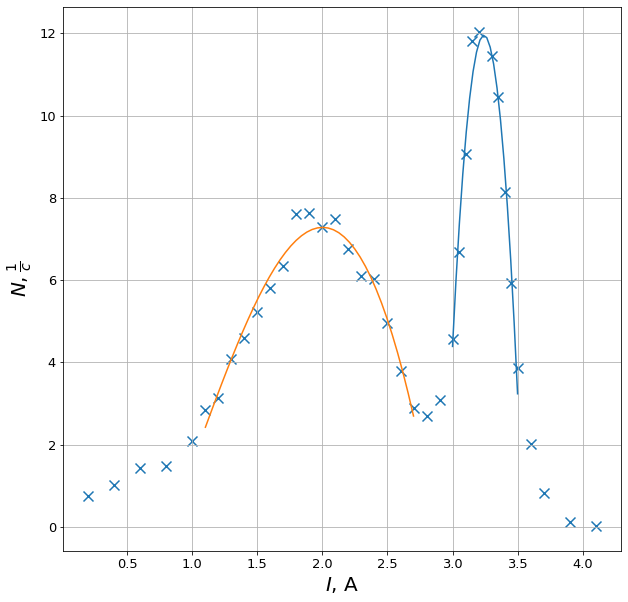

In [78]:
plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.scatter (I, N, marker = 'x', s=100)

ax.plot (gauss_range, gauss_result)
ax.plot (  par_range,   par_result)

ax.set_xlabel ('$I$, А', fontsize = 20)
ax.set_ylabel ('$N, \\frac{1}{с}$', fontsize = 20)

# plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/N_I.pdf")

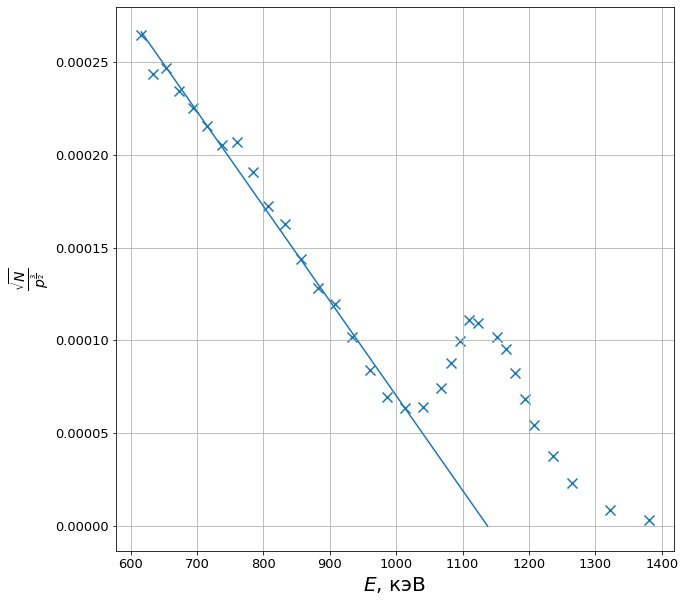

In [92]:
plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.scatter (E, y, marker = 'x', s=100)

linear = lambda x: F_K.k * x + F_K.b
lin_range = np.array ([E[0], E_max])
ax.plot (lin_range, linear (lin_range)) 

ax.set_xlabel ('$E$, кэВ', fontsize = 20)
ax.set_ylabel ('$\\frac{\\sqrt{N}}{p^{\\frac{3}{2}}}$', fontsize = 20)

# plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/F-K.pdf")